### 1D Beam solving - analytic and numeric methods

* Domain
    * 1D : y $\in$ (0, L) $\in$ $\mathbb{R}$
    * y : curvilinear variable


* Material
    * elastical, isotropic, homogeneous, HPP
    
    
* Equation
    * areal force  : $\underline{L} = L \underline{e}_z$
    * areal moment : $\underline{m} = (M_{ac} + e\times L)\underline{e}_z$
    * BC :
        * clamped in $y=0$
        * free in $y=L$
        
Note : it may be $L=L'$ and $M=M'$ given constant section.

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Mesh

In [2]:
# ------
# mesh
# ------

L  = 20
Ny = 200
dy = L / Ny
y  = np.linspace(0, L, Ny)

# -------
# data : better check non unit A and B to make sure result is accurate

mt    = 1
eqca  = 2
GJ    = 1
Mac   = 1
alpha = 1

eqca_alpha = eqca*alpha
lmbda = np.sqrt(eqca / GJ)

B     = (Mac + eqca_alpha) / GJ
A     = lmbda**2

#### analytical displacement

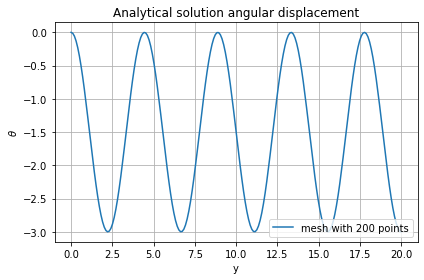

In [3]:
# -------------
# Displacement
# -------------

theta_ana = (B / A) * (np.cos(lmbda*y) + np.tan(lmbda*L)*np.sin(lmbda*y) - 1)

plt.plot(y, theta_ana, label=f'mesh with {Ny} points')

plt.title('Analytical solution angular displacement')
plt.xlabel('y')
plt.ylabel(r'$\theta$')

plt.grid(True)
plt.legend(loc=4)

plt.tight_layout()

#### numerical displacement - finite difference

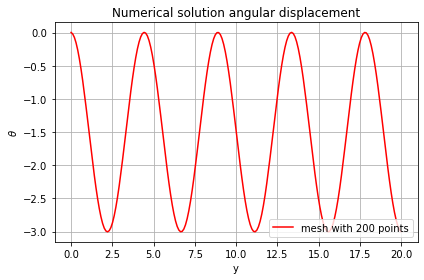

In [4]:
M = np.zeros((Ny, Ny)) #matrix space

M = (A - 2 / dy**2) * np.eye(Ny, k=0)
M += 1/ dy**2 * (np.eye(Ny, k=1) + np.eye(Ny, k=-1))

# BC
M[0,0]   = (A - 3 / dy**2)
M[-1,-1] = (A - 1 / dy**2)

# b vector in M x theta = b
b = -B * np.ones((Ny))

# -------------
# Displacement
# -------------

theta_num = np.linalg.solve(M, b)
plt.plot(y, theta_num, 'r', label=f'mesh with {Ny} points')

plt.title('Numerical solution angular displacement')
plt.xlabel('y')
plt.ylabel(r'$\theta$')

plt.grid(True)
plt.legend(loc=4)

plt.tight_layout()

#### Study L2 error + times execution with mesh varying

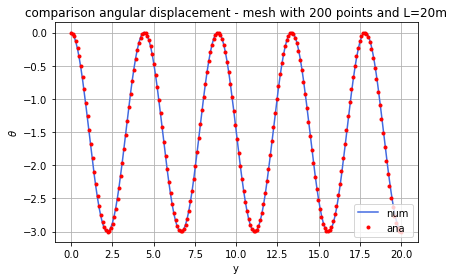

In [5]:
plt.plot(y, theta_num, "royalblue", y, theta_ana, 'r.')

plt.title(f'comparison angular displacement - mesh with {Ny} points and L={L}m')
plt.xlabel('y')
plt.ylabel(r'$\theta$')

plt.grid(True)
plt.legend(['num', 'ana'], loc=4)

plt.tight_layout()

#### L2 norm relative error

In [6]:
error_L2 = np.sum((theta_num - theta_ana)**2) / np.sum(theta_ana**2)

print('L2 relative error : e={:.2f} %'.format(error_L2*100))

L2 relative error : e=0.04 %


#### Evolution l2 norm relative error as a function of the mesh's size

0.0007762572634485043


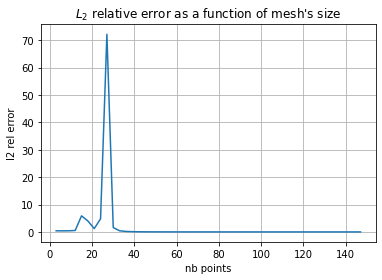

In [7]:
dim = np.array([3*_ for _ in range(1, 50)]) # nb of mesh's size to test + range

error_L2_iter = np.zeros((np.size(dim)))

for i, n in zip(range(np.size(dim)), dim):
    
    y  = np.linspace(0, L, n)
    dy = L / n
    
    # --------------------------------------------------
    # analytical solution
    
    theta_ana = (mt /eqca) * (np.cos(lmbda*y) + np.tan(lmbda*L)*np.sin(lmbda*y) - 1)

    # --------------------------------------------------
    # numerical  solution
    
    M = np.zeros((n, n)) #matrix space

    M = (A - 2 / dy**2) * np.eye(n, k=0)
    M += 1/ dy**2 * (np.eye(n, k=1) + np.eye(n, k=-1))

    # BC
    M[0,0]   = (A - 3 / dy**2)
    M[-1,-1] = (A - 1 / dy**2)

    # b vector
    B = -1 * np.ones((n))

    # -------------
    # Displacement
    # -------------

    theta_num = np.linalg.solve(M, B)

    # --------------------------------------------------
    
    error_L2_iter[i] = np.sum((theta_num - theta_ana)**2) / np.sum(theta_ana**2)

plt.plot(dim, error_L2_iter)

plt.title(r"$L_2$ relative error as a function of mesh's size")
plt.xlabel('nb points')
plt.ylabel('l2 rel error')

plt.grid(True)

# -----------------------

print(error_L2_iter[-1])

$\Rightarrow$ **One can see the two solution are close after one considers enough points for the mesh. This value depends on the mesh : L, Ny, etc.**

**For one to reduce the nb of points in the mesh, one should for instance consider a lower mesh.**

**As working on a sinusoidal function, the error may look low but it can switch with few more points.**